# QC Analysis of CTD Oxygen Data 
- from CTD Bottle samples and Winkler Titrations 
- Seabird Documentation [weblink](http://www.seabird.com/document/an64-2-sbe-43-dissolved-oxygen-sensor-calibration-and-data-corrections)

## Data Sources
- Seabird .btl files
- Oxy titration values from C.Mordy / E.Weisgarver
- Field notes and metadata

### Before importing here you must
- build the excel file

(currently these are all combined in an excel file - **TODO**: work from the orignal files)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

In [6]:
source_file = '/Users/bell/ecoraid/2017/CTDcasts/dy1708/working/DiscreteOxygen/DY1708_Oxygen_Data.xlsx'

In [7]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [8]:
df = pd.read_excel(source_file,sheet_name='Comparison',date_parse='date_time',index_col='date_time')


In [9]:
df.dropna(subset=['cast','O2, uM/kg00','O2, uM/kg01','Sbeox0Mm/Kg','Sbeox1Mm/Kg'],inplace=True)
df

,cast,date,time,nb,Sal00,Sal11,Sbeox0Mm/Kg,Sbeox0PS,Sbeox1Mm/Kg,Sigma-t00,...,Unnamed: 18,BottleID,NiskinNo,Unnamed: 21,Cast,Niskin,O2 (uM/l),"O2, uM/kg00","O2, uM/kg01",Notes
date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-23 19:06:44,ctd001,2017-09-23,19:06:44,5,31.9358,31.9244,223.921,66.319,227.546,25.5102,...,0.9644,150:5:CTD001,5,x,1,5,249.933856,243.658618,243.660786,NaN
2017-09-23 19:49:29,ctd002,2017-09-23,19:49:29,8,31.5995,31.5877,271.509,91.280,275.077,24.6741,...,0.2268,161:8:CTD002,8,x,2,8,302.373082,295.086817,295.089498,NaN
2017-09-24 05:54:12,ctd003,2017-09-24,05:54:12,1,31.9164,31.9053,225.329,66.445,227.656,25.5066,...,1.1527,168:1:CTD003,1,x,3,1,252.738886,246.371690,246.373823,NaN
2017-09-24 08:11:12,ctd004,2017-09-24,08:11:12,7,31.5586,31.5466,273.587,93.172,276.429,24.5603,...,0.2840,172:7:CTD004,7,x,4,7,304.507777,297.203104,297.205859,NaN
2017-09-24 10:32:46,ctd005,2017-09-24,10:32:46,1,31.8664,31.8555,224.720,65.710,227.270,25.4881,...,0.9168,175:1:CTD005,1,x,5,1,250.032569,243.742944,243.745011,NaN
2017-09-24 12:45:45,ctd006,2017-09-24,12:45:45,7,31.5707,31.5586,277.451,93.701,280.169,24.6226,...,0.3733,181:7:CTD006,7,x,6,7,310.579312,303.110864,303.113712,NaN
2017-09-24 15:21:50,ctd007,2017-09-24,15:21:50,1,31.8152,31.8044,238.088,69.485,240.337,25.4510,...,0.9778,197:1:CTD007,1,x,7,1,267.135229,260.425874,260.428066,NaN
2017-09-24 18:13:38,ctd008,2017-09-24,18:13:38,7,31.4667,31.4551,287.981,96.110,290.433,24.6074,...,0.4793,209:7:CTD008,7,x,8,7,274.850281,268.245540,268.247942,NaN
2017-09-24 21:15:06,ctd009,2017-09-24,21:15:06,1,31.6675,31.6568,262.577,76.301,264.956,25.3405,...,1.2083,215:1:CTD009,1,x,9,1,292.898599,285.570357,285.572741,NaN


### Bottle-Winkler(Flask) Oxygen
(referred to as Offset)

Text(0.5,0,'Temperature')

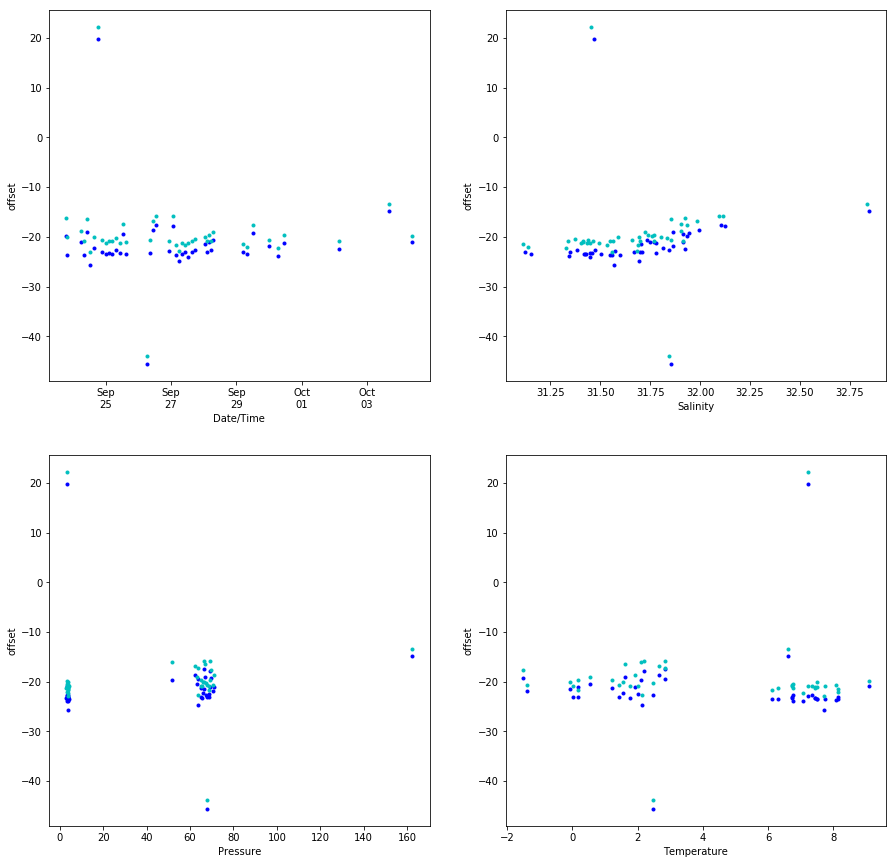

In [10]:
fig, ax = plt.subplots(2,2,'none',figsize=(15, 15))
plt.subplot(221)
plt.plot(df.index,(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df.index,(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
ax = plt.gca()
xfmt = mdates.DateFormatter('%b\n%d')
ax.xaxis.set_major_formatter(xfmt)
plt.ylabel('offset')
plt.xlabel('Date/Time')

plt.subplot(222)
plt.plot(df['Sal00'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['Sal11'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Salinity')

plt.subplot(223)
plt.plot(df['PrDM'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['PrDM'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Pressure')

plt.subplot(224)
plt.plot(df['T090C'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['T190C'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Temperature')


In [11]:
z1 = np.polyfit(x=df['Sbeox0Mm/Kg'].values, y=df['O2, uM/kg00'].values, deg=1)
z2 = np.polyfit(x=df['Sbeox1Mm/Kg'].values, y=df['O2, uM/kg01'].values, deg=1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
df['trendline1'] = p1(df['Sbeox0Mm/Kg'].values)
df['trendline2'] = p2(df['Sbeox1Mm/Kg'].values)

Text(0.5,0,'SBE CTD Oxygens uM/kg')

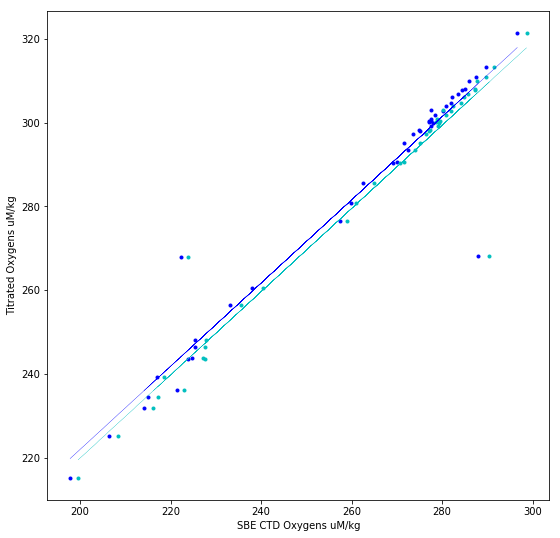

In [12]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.plot(df['Sbeox0Mm/Kg'],df['O2, uM/kg00'],'b.')
plt.plot(df['Sbeox1Mm/Kg'],df['O2, uM/kg01'],'c.')
plt.plot(df['Sbeox0Mm/Kg'],df['trendline1'],'b--',linewidth=0.25)
plt.plot(df['Sbeox1Mm/Kg'],df['trendline2'],'c--',linewidth=0.25)
plt.ylabel('Titrated Oxygens uM/kg')
plt.xlabel('SBE CTD Oxygens uM/kg')

In [13]:
print('Primary: y={0:.3f} x + {1:.2f}'.format(z1[0],z1[1]))
print('Secondary: y={0:.3f} x + {1:.2f}'.format(z2[0],z2[1]))

Primary: y=0.993 x + 23.47
Secondary: y=0.993 x + 21.41


#### Correct for linear fit

In [16]:
df['Primary'] = 0.993 * df['Sbeox0Mm/Kg'] + 23.47
df['Secondary'] = 0.993 * df['Sbeox1Mm/Kg'] + 21.41

Text(0.5,0,'Temperature')

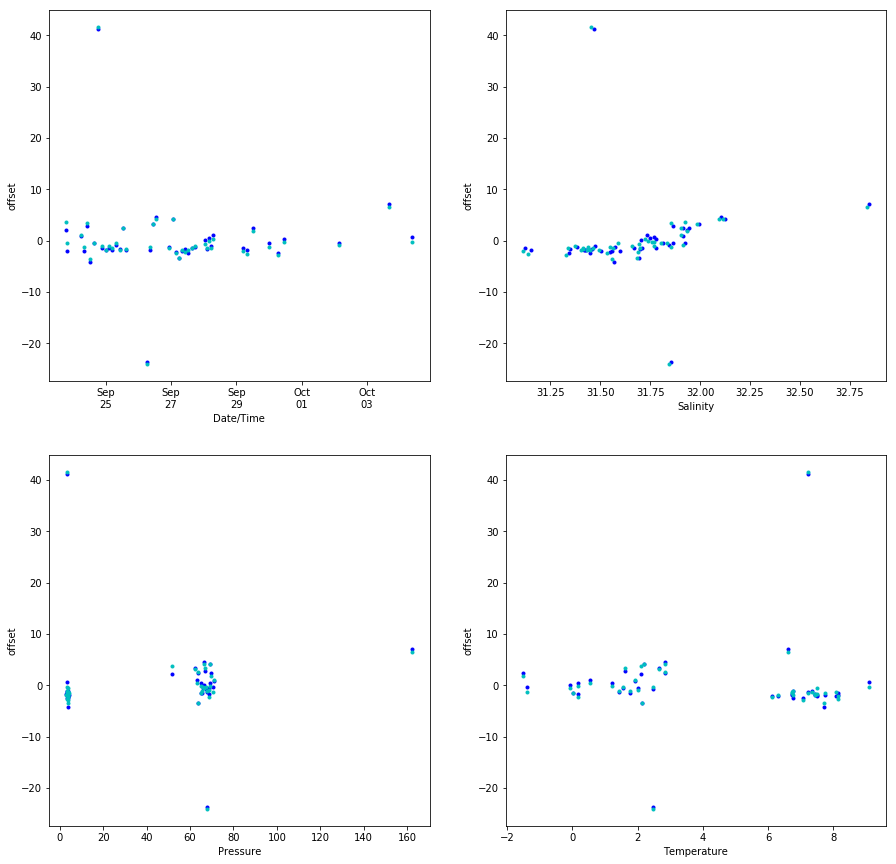

In [17]:
fig, ax = plt.subplots(2,2,'none',figsize=(15, 15))
plt.subplot(221)
plt.plot(df.index,(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df.index,(df['Secondary']-df['O2, uM/kg01']),'c.')
ax = plt.gca()
xfmt = mdates.DateFormatter('%b\n%d')
ax.xaxis.set_major_formatter(xfmt)
plt.ylabel('offset')
plt.xlabel('Date/Time')

plt.subplot(222)
plt.plot(df['Sal00'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['Sal11'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Salinity')

plt.subplot(223)
plt.plot(df['PrDM'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['PrDM'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Pressure')

plt.subplot(224)
plt.plot(df['T090C'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['T190C'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Temperature')


**TODO:** Validate Seabird suggested methodology with our original methodology and generate a report like this one for every cruise from hereon